In [59]:
import hnn_core
import os.path as opx
import matplotlib.pyplot as plt
import time
import numpy as np
from hnn_core import jones_2009_model, simulate_dipole, read_params
from hnn_core.network_models import add_erp_drives_to_jones_model

Write function that accepts a net object and parameters theta as input, and returns the simulated current dipole dpl[0].data['agg'] (agg stands for “aggregate”)

In [60]:
def run_simulation(net, theta):
    # "theta" is just a float number
    
    net_sim = net.copy()
    
    # your code here that updates "mu" or mean time of drives using parameter theta
    weights_ampa = {'L2_basket': 0.09, 'L2_pyramidal': 0.02, 
                'L5_basket': 0.2, 'L5_pyramidal': 8e-3}
    synaptic_delays = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                   'L5_basket': 1.0, 'L5_pyramidal': 1.0}

    net_sim.add_evoked_drive(name='evprox1', mu=100, sigma=theta, numspikes=1,
                     weights_ampa=weights_ampa, location='proximal',
                     synaptic_delays=synaptic_delays)  # mu=theta
    
    dpl = simulate_dipole(net_sim, dt=0.5, tstop=170) # , n_trials=2

    return net_sim, dpl[0].data['agg']   #net_sim, 

Using a random number generator, create a vector of random “start times” called theta_samples that are uniformly distributed between [20, 160]

In [61]:
def generate_theta_samples(size):
    return np.random.uniform(low=20, high=160, size=size)

In [62]:
# theta_samples = generate_theta_samples(128)
theta_samples = np.linspace(0, 30, 8)

Look into parallelizing these simulations using joblib

In [63]:
net = jones_2009_model()

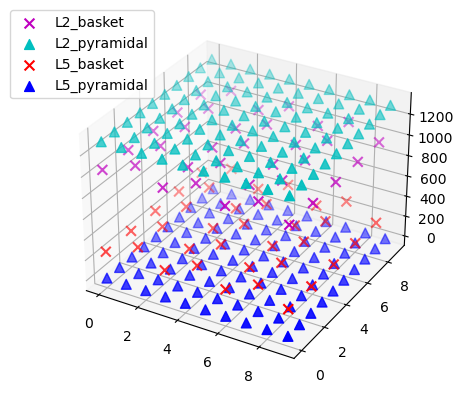

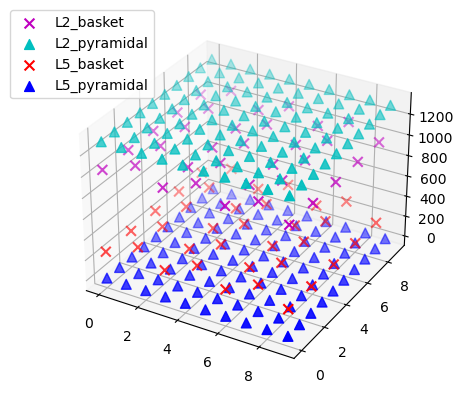

In [64]:
net.plot_cells()

In [65]:
net.clear_connectivity()

In [66]:
start_time = time.time()

from joblib import Parallel, delayed
res = np.array(Parallel(n_jobs=8)(delayed(run_simulation)(net, theta) for theta in theta_samples))

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.


Execution time: 4.362928867340088 seconds


/var/folders/1p/sf57j0k93z103tg3g01ch4k80000gn/T/ipykernel_64167/1598601830.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(Parallel(n_jobs=8)(delayed(run_simulation)(net, theta) for theta in theta_samples))


In [67]:
res[0,0]

<Network | 10 x 10 Pyramidal cells (L2, L5)
35 L2 basket cells
35 L5 basket cells>

In [68]:
res[0,1].shape

(341,)

In [69]:
len(res[0,0].cell_response.spike_types[0])

497

In [70]:
mask = np.array(res[0,0].cell_response.spike_types[0]) == 'evprox1'
np.sum(mask)

270

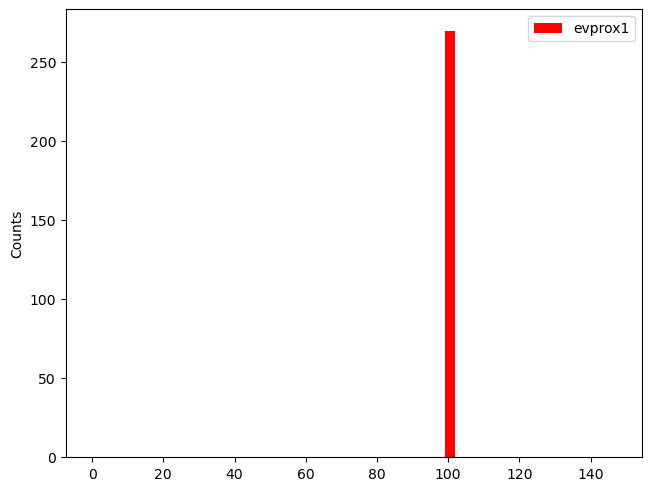

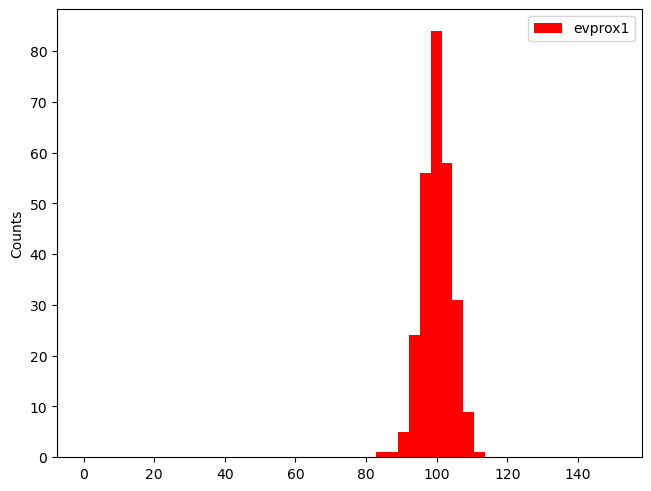

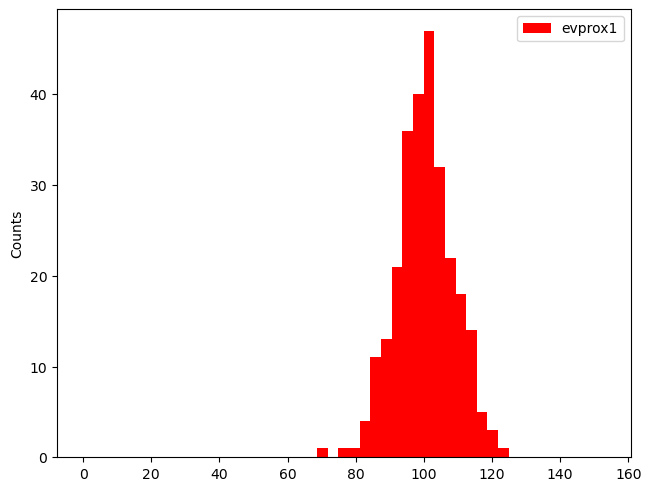

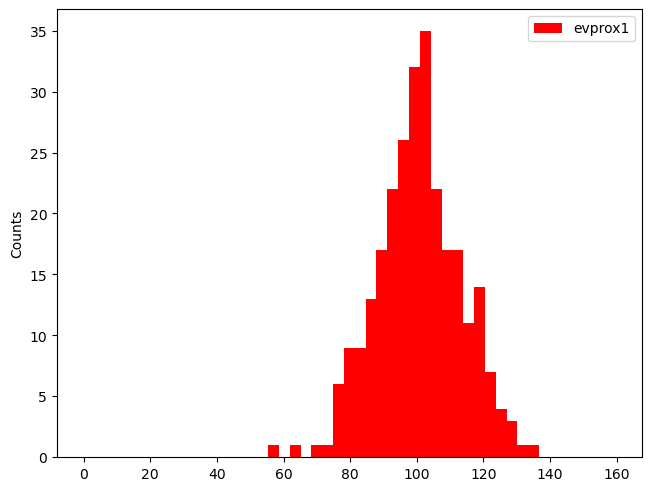

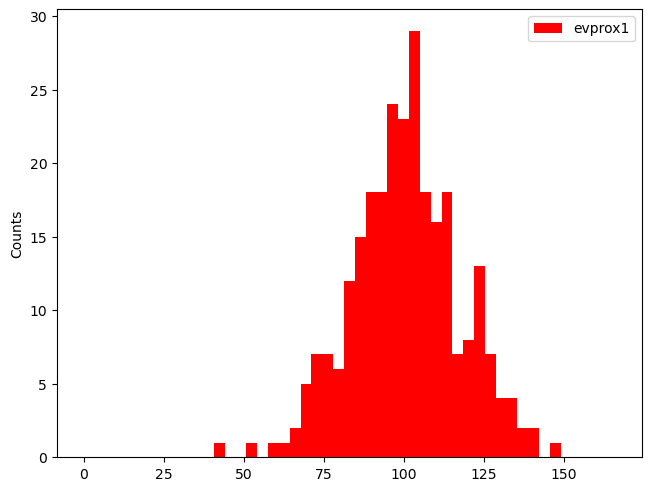

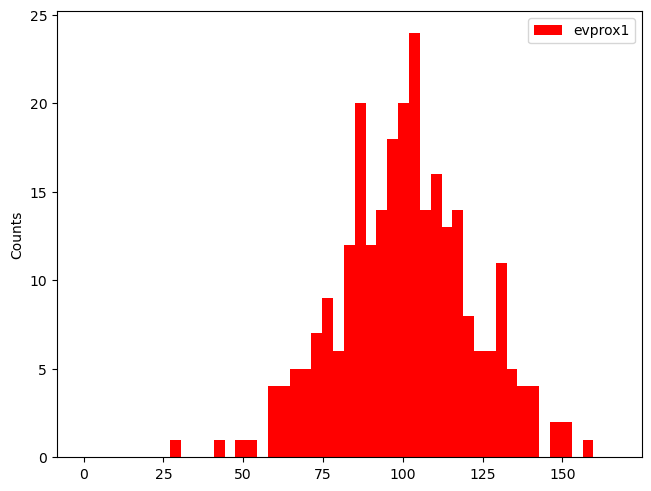

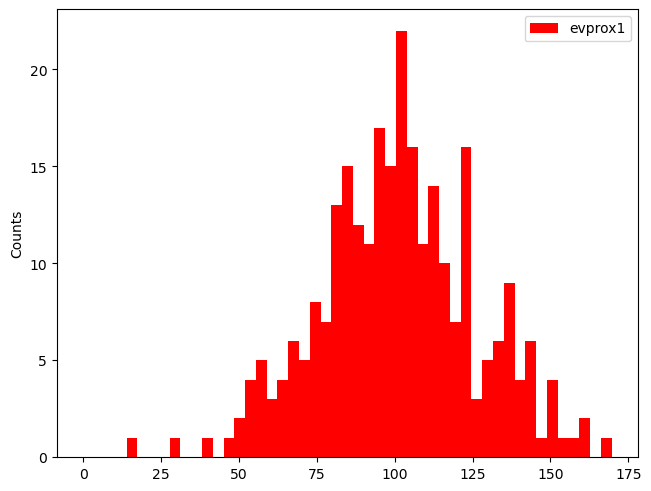

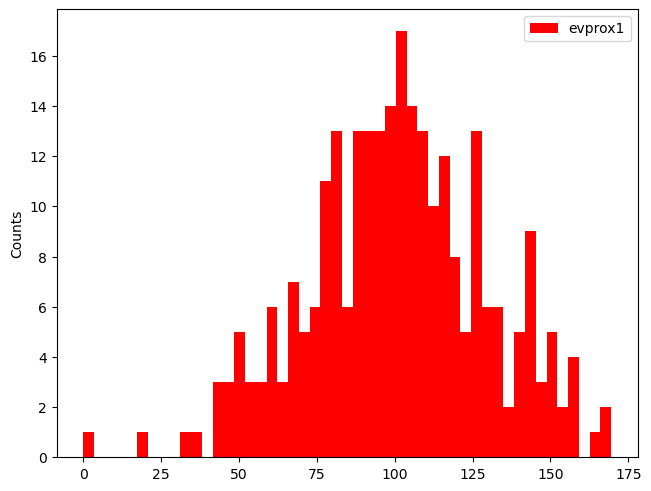

In [71]:
for i in range(len(res)):
    res[i,0].cell_response.plot_spikes_hist()

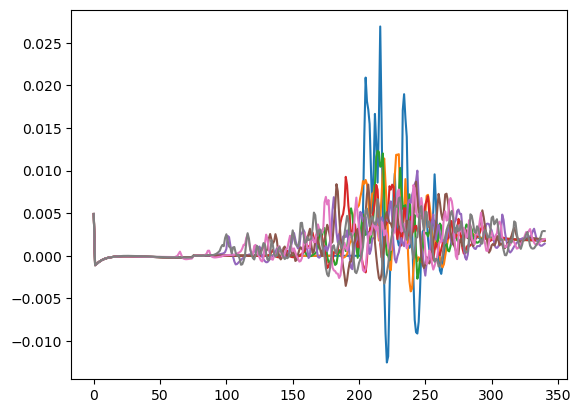

In [72]:
for i in range(len(res)):
    plt.plot(res[i,1].T)